In [1]:
using Revise
#using Random, Distributions
using CSV
using DataFrames
using StatsBase
using CairoMakie

include("../src/SpectralStatistics.jl")
import .SpectralStatistics as stats

In [5]:
folder = pwd() * "/data"
filename = "/unfolded_spectrum.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
e = df.Column1

spectrum = stats.UnfoldedSpectrum(e) #unfolded spectrum Type
goe = stats.GOE_statistics(); #model Type 

In [10]:
min = 0.0
max = 5.0
grid = 200
var = collect(LinRange(min, max, grid))
statistic = "level_spacing_pdf"
n = 1 #order of level spacing n= 1 means nearest neighbour
x, res = stats.compute_statistic(spectrum, statistic , var; n=n)
model = stats.compute_statistic(goe, statistic , var);

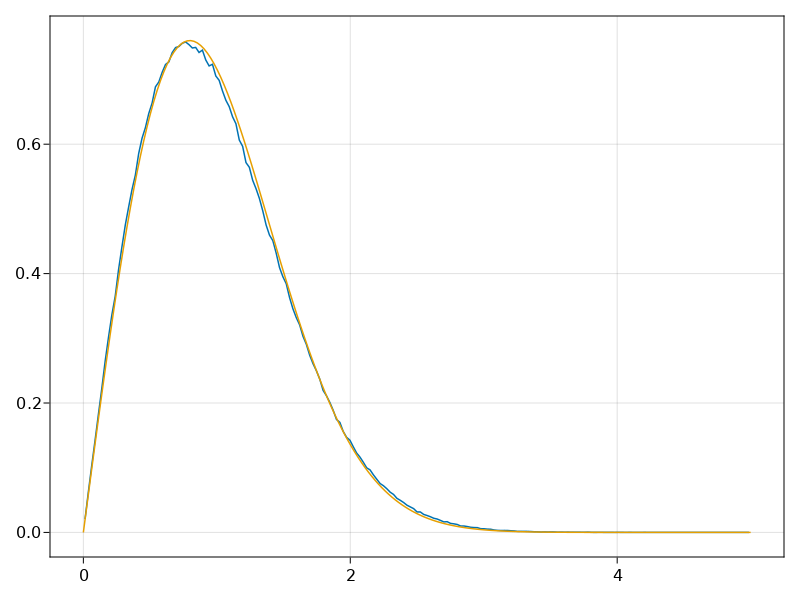

In [11]:
f, ax, l1 = lines(x,res)
l2 = lines!(ax, var, model)
f

In [13]:
min = 0.0
max = 100.0
grid = 200
var = collect(LinRange(min, max, grid))
statistic = "number_variance"
res = stats.compute_statistic(spectrum, statistic , var)
model = stats.compute_statistic(goe, statistic , var);

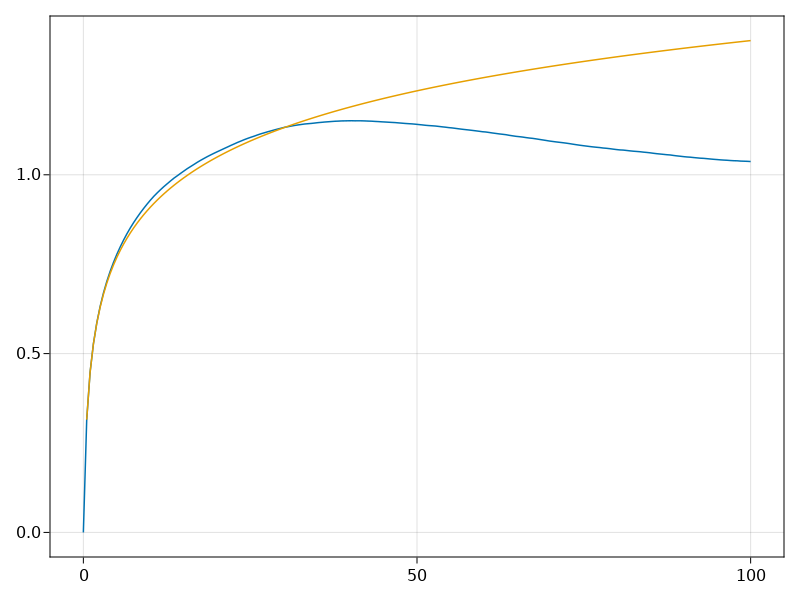

In [15]:
f, ax, l1 = lines(var,res)
l2 = lines!(ax, var, model)
f